In [34]:
!pip install scikit-learn

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('diamonds.csv')
print(data.head())

              Shape    Cut Color Clarity  Carat Weight  Length/Width Ratio  \
0  Cushion Modified  Ideal     F    VVS2          1.84                1.02   
1              Pear    NaN     E     VS1          1.20                1.65   
2              Oval    NaN     E     VS1          1.19                1.41   
3             Heart    NaN     D      IF          1.00                1.18   
4           Radiant    NaN     H     VS1          1.01                1.35   

   Depth %  Table %     Polish   Symmetry                        Girdle Culet  \
0     65.8     59.0  Excellent  Very Good               Medium to Thick   NaN   
1     62.5     58.0  Very Good  Very Good               Medium to Thick   NaN   
2     63.1     63.0  Very Good  Very Good               Medium to Thick   NaN   
3     61.7     58.0  Excellent  Excellent  Slightly Thick to Very Thick   NaN   
4     69.4     66.0  Excellent  Very Good                         Thick   NaN   

   Length  Width  Height  Price           Ty

In [6]:
print(data.isnull().sum())

Shape                    5
Cut                   4303
Color                    5
Clarity                  5
Carat Weight             5
Length/Width Ratio       5
Depth %                  7
Table %                 17
Polish                  20
Symmetry                20
Girdle                  22
Culet                 4594
Length                  20
Width                   20
Height                  20
Price                    0
Type                     0
Fluorescence          5264
dtype: int64


In [46]:
##Wszystkie missingi pokonać dzięki Simple Imputer
imputer=SimpleImputer(strategy='mean')
data['Carat Weight']=imputer.fit_transform(data[['Carat Weight']])
data['Length/Width Ratio']=imputer.fit_transform(data[['Length/Width Ratio']])
data['Depth %']=imputer.fit_transform(data[['Depth %']])
data['Table %']=imputer.fit_transform(data[['Table %']])
data['Length']=imputer.fit_transform(data[['Length']])
data['Width']=imputer.fit_transform(data[['Width']])
data['Height']=imputer.fit_transform(data[['Height']])

In [56]:
##Correlation Heatmap
df_encoded=pd.get_dummies(data,drop_first=True)
df_encoded.head(5)

,Carat Weight,Length/Width Ratio,Depth %,Table %,Length,Width,Height,Price,Shape_Cushion Modified,Shape_Emerald,...,Girdle_Very Thin to Thick,Girdle_Very Thin to Very Thick,Culet_Pointed,Culet_Small,Culet_Very Large,Culet_Very Small,Type_GIA Lab-Grown,Type_IGI Lab-Grown,Fluorescence_Medium,Fluorescence_Strong
0,1.84,1.02,65.8,59.0,7.09,6.95,4.57,2640,True,False,...,False,False,False,False,False,False,True,False,False,False
1,1.20,1.65,62.5,58.0,9.64,5.86,3.66,1070,False,False,...,False,False,False,False,False,False,True,False,False,False
2,1.19,1.41,63.1,63.0,8.44,6.00,3.79,1070,False,False,...,False,False,False,False,False,False,True,False,False,False
3,1.00,1.18,61.7,58.0,5.85,6.89,4.25,7110,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1.01,1.35,69.4,66.0,6.80,5.05,3.50,3050,False,False,...,False,False,False,False,False,False,False,False,False,False


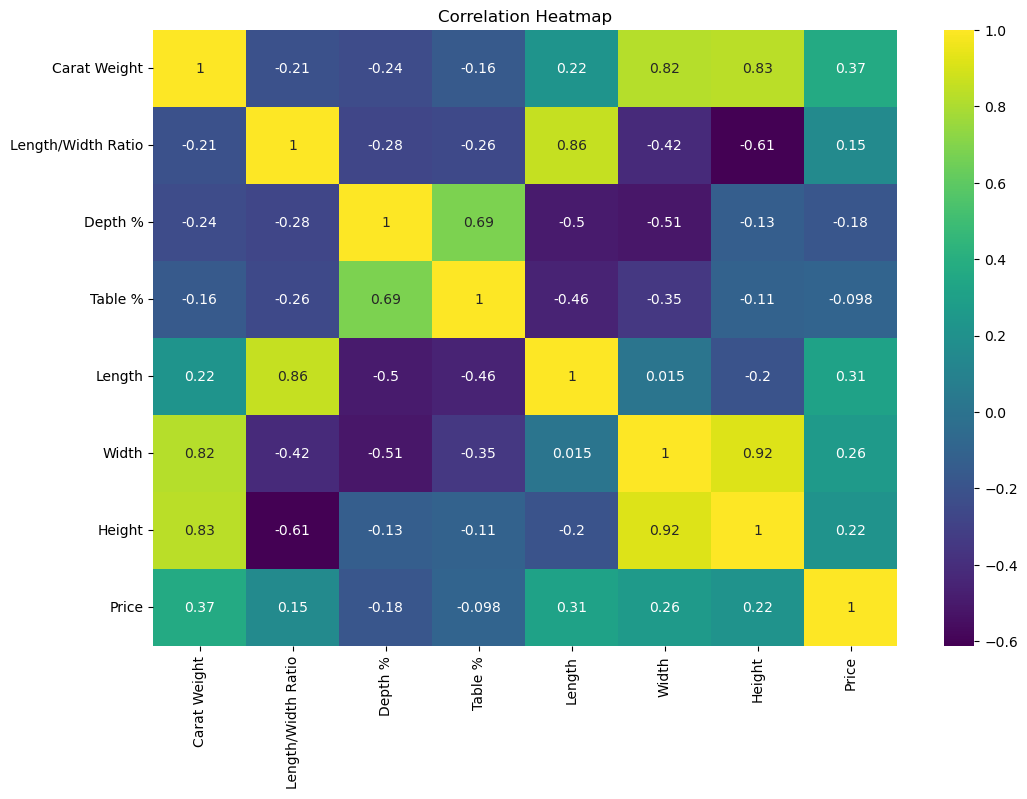

In [60]:
numerics=df_encoded.select_dtypes(include=[np.number])
plt.figure(figsize=(12,8))
sns.heatmap(numerics.corr(),annot=True,cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

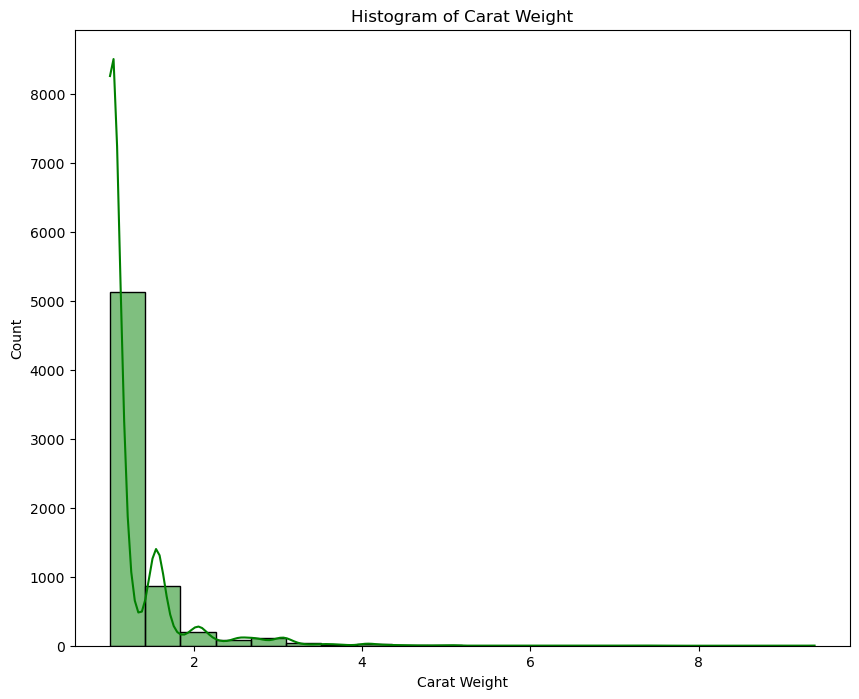

In [64]:
#Histogram of Carat Weight
plt.figure(figsize=(10,8))
sns.histplot(data['Carat Weight'],kde=True,color='green',bins=20)
plt.title("Histogram of Carat Weight")
plt.show()

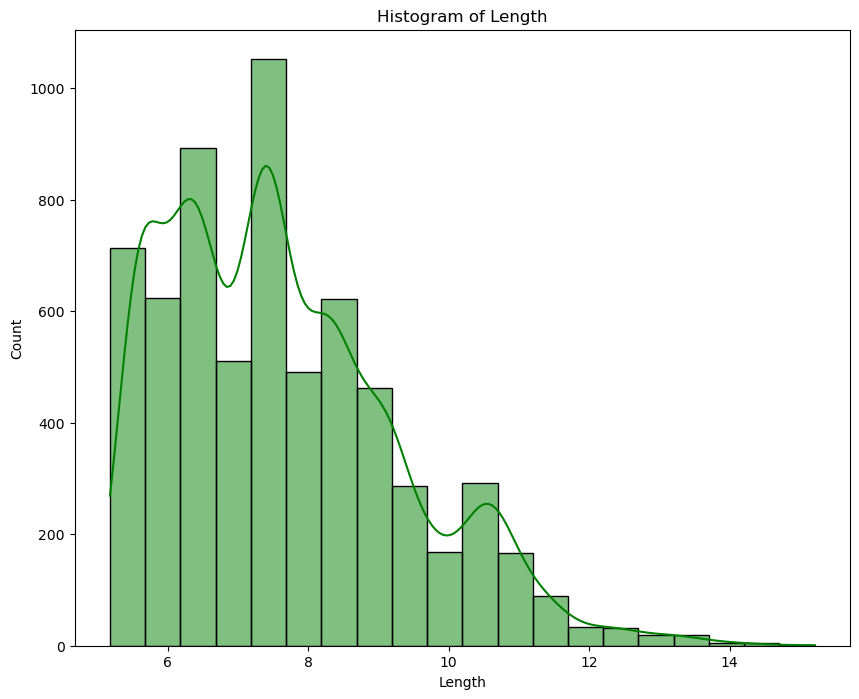

In [66]:
#Histogram of Length/Width Ratio
plt.figure(figsize=(10,8))
sns.histplot(data['Length'],kde=True,color='green',bins=20)
plt.title('Histogram of Length')
plt.show()

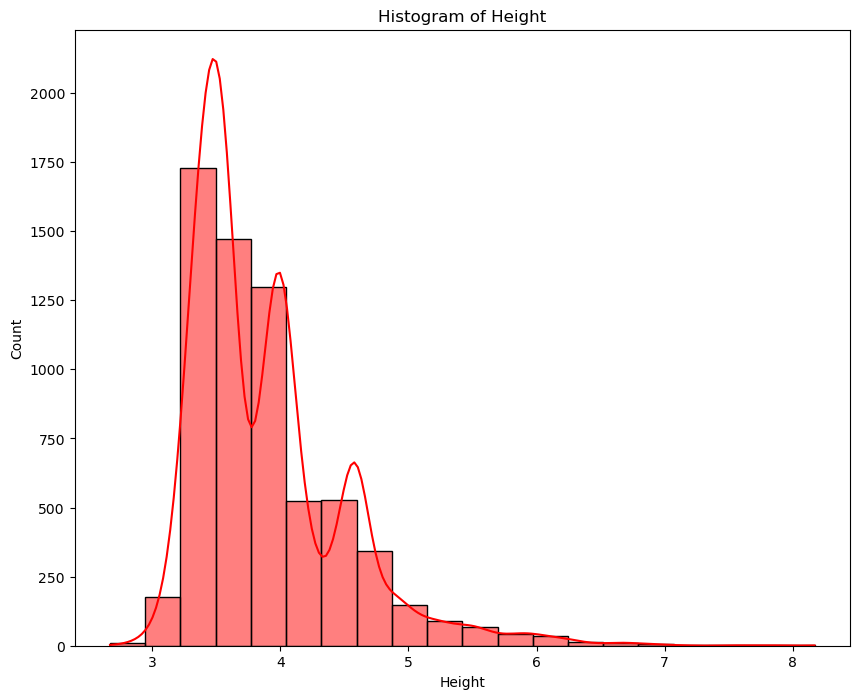

In [68]:
#Histogram of Height
plt.figure(figsize=(10,8))
sns.histplot(data['Height'],kde=True,color='red',bins=20)
plt.title('Histogram of Height')
plt.show()

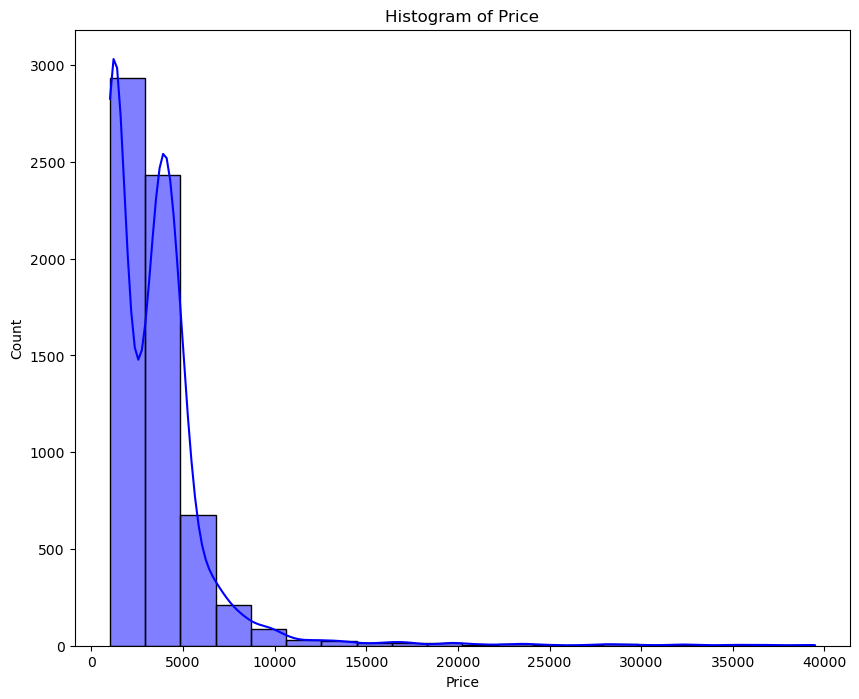

In [70]:
#Histogram of Price
plt.figure(figsize=(10,8))
sns.histplot(data['Price'],kde=True,color='blue',bins=20)
plt.title('Histogram of Price')
plt.show()

In [72]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [74]:
numerical_cols=data.select_dtypes(include=['float64','int64']).columns

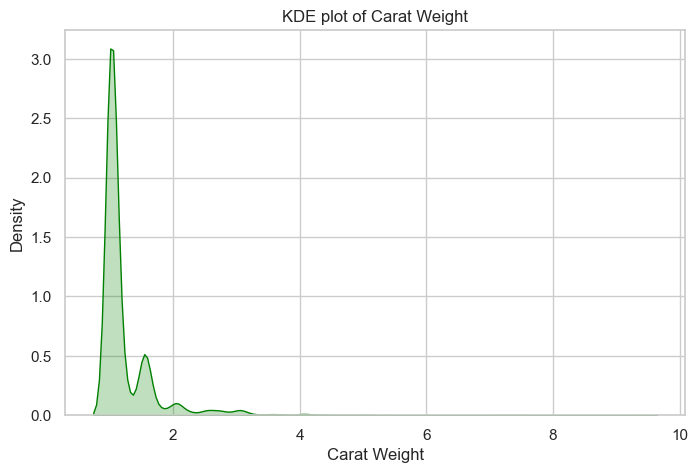

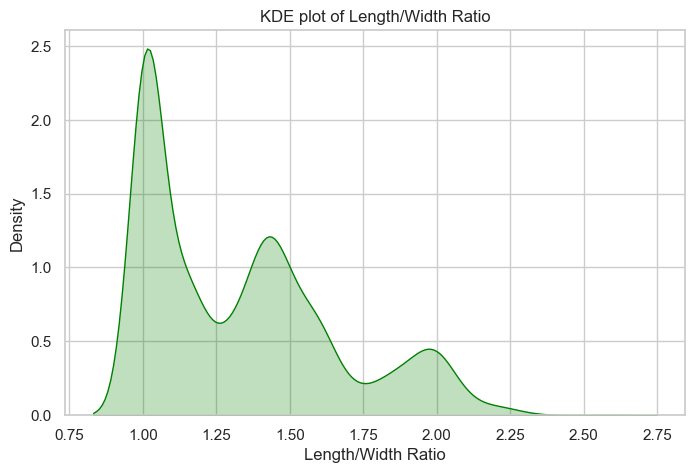

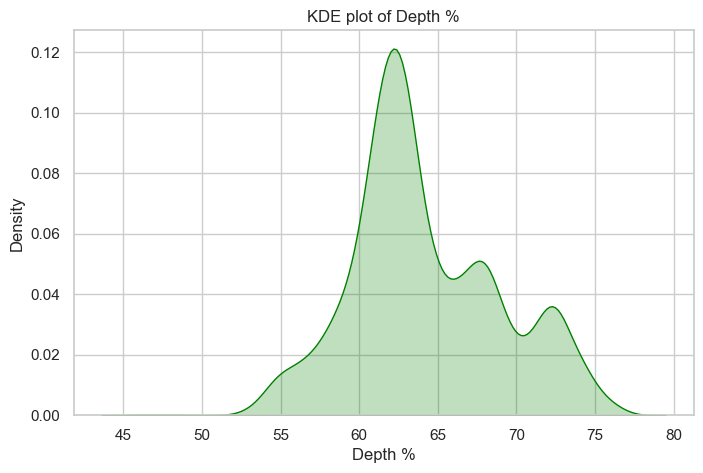

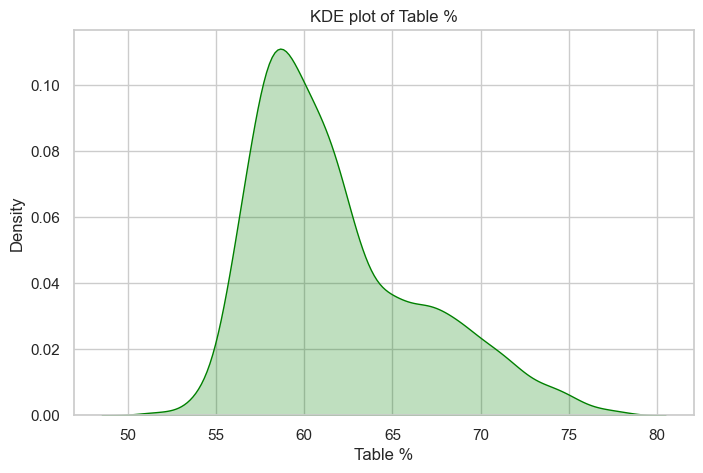

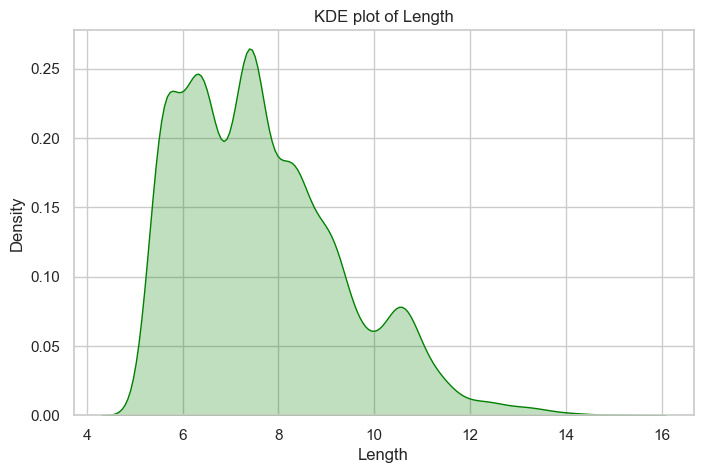

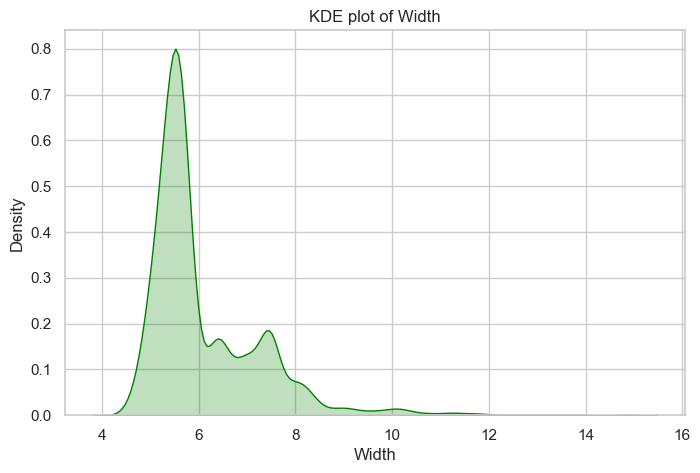

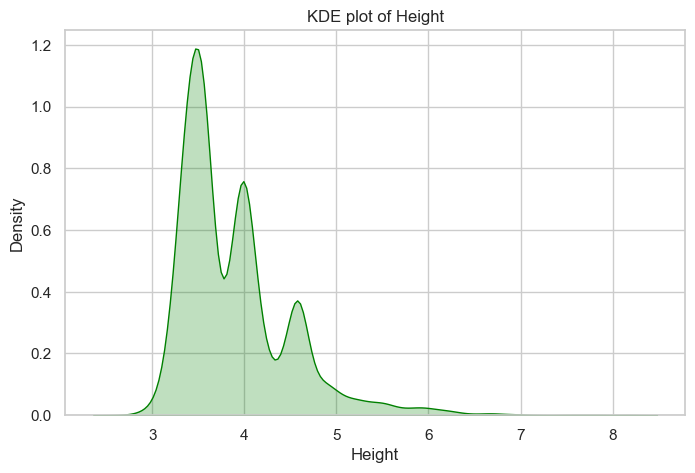

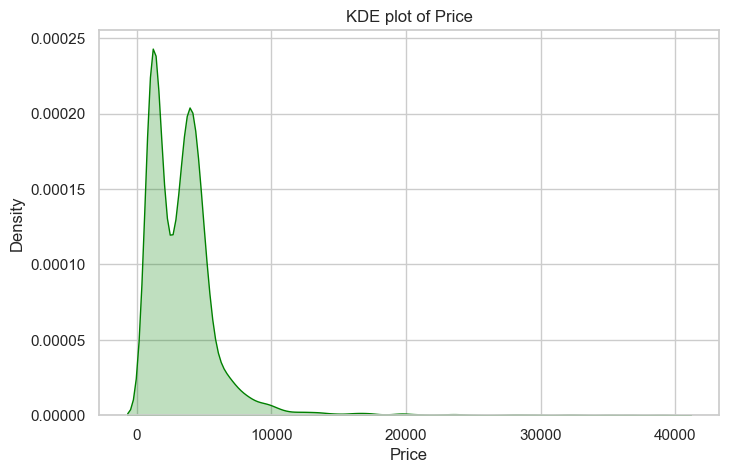

In [78]:
for col in numerical_cols:
    plt.figure(figsize=(8,5))
    sns.kdeplot(data[col],fill=True,color='green')
    plt.title(f'KDE plot of {col}')
    plt.show()

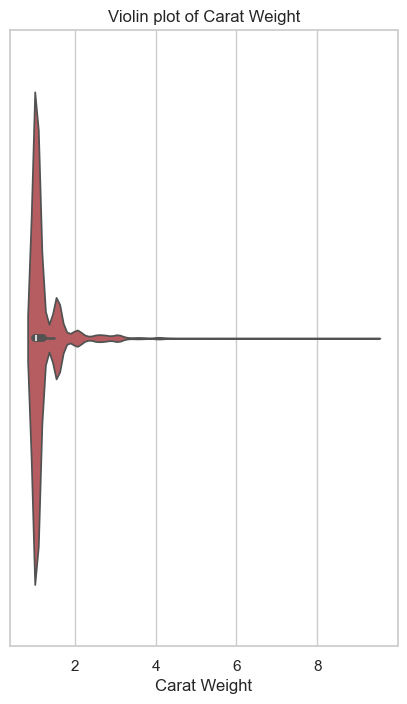

ValueError: Invalid RGBA argument: 'e'

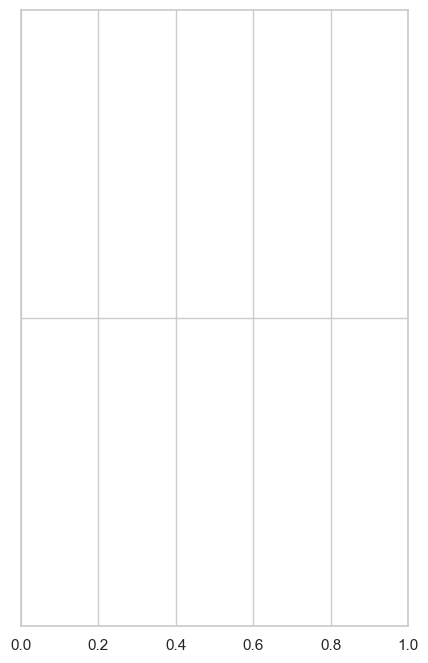

In [104]:
#Violin Plots
for col in numerical_cols,color:
    for color in colors:
        plt.figure(figsize=(5,8))
        sns.violinplot(x=data[col],color='red')
        plt.title(f'Violin plot of {col}')
        plt.show()

In [90]:
#distribution of numerical features

In [92]:
#scatterplot carat weight vs length

In [94]:
#Shape distribution

In [96]:
#Cut distriutionn

In [98]:
#Bar plot of shape